<a href="https://colab.research.google.com/github/B104020057/PIS2022/blob/main/EX03_05_%E5%8F%B0%E7%81%A3%E8%82%A1%E7%A5%A8%E5%B8%82%E5%A0%B4%E5%80%8B%E8%82%A1%E6%AF%8F%E6%97%A5%E6%88%90%E4%BA%A4%E8%B3%87%E8%A8%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
#url去https://www.twse.com.tw/zh/page/trading/exchange/STOCK_DAY.html，代碼：0050，列印html直接複製網址
url = 'https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20250415&stockNo=0050&response=html' #date可以手動改想要的日期（不超過今天）but一次都會撈一個月的資料
df = pd.read_html(url,header=1)[0]
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,114/04/01,13028846,2284423833,173.60,176.55,173.60,176.30,3.55,30395
1,114/04/02,11506862,2032740660,176.85,177.35,176.00,176.00,-0.30,25430
2,114/04/07,29578872,4685331802,158.40,158.40,158.40,158.40,-17.60,110835
3,114/04/08,88850426,13617537740,151.20,157.45,150.55,153.25,-5.15,155906
4,114/04/09,83829139,12545864892,152.50,154.15,145.00,146.20,-7.05,167496
5,114/04/10,6081831,977956987,160.80,160.80,160.80,160.80,14.60,8425
6,114/04/11,51081199,8202752084,157.25,164.55,155.35,164.55,3.75,77370
7,114/04/14,47341078,7858911823,168.50,168.70,163.50,163.70,-0.85,79217
8,114/04/15,19827286,3265491048,164.05,165.50,163.30,165.35,1.65,37396
9,114/04/16,27131302,4408343222,163.80,163.80,161.40,162.35,-3.00,64314


In [48]:
# 下載台北黑體字型
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2025-04-22 06:58:24--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.203.100, 74.125.203.102, 74.125.203.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.203.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-04-22 06:58:24--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.157.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  --.-KB/s    in 0.09s   

2025-04-22 06:58:27 

In [50]:
import matplotlib
import matplotlib.pyplot as plt
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 設定中文字型及負號正確顯示
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

In [52]:
#請使用 pd.read_html() 取得 0050 的過去一年的日成交資訊，透過修改date來撈（forloop）
import pandas as pd
def get_stock_data(date,stock_no):
    url = f'https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_no}&response=html' #字串格式化f'{}'
    df = pd.read_html(url,header=1)[0]
    return df

date_list = []
#方法一：
#20240401-20250401
#years = [2024,2025]
#從4月開始算+12個月(因爲取餘數+1，所以從3開始16結束)
#for i in range(3,16):
#    year = years[i//12]
#    month = i%12 + 1
#    #print(year,month)
#    date_list.append(f'{year}{month:02}01')
#date_list #印出來的結果是一樣的#

#第二種方法pandas内建的function：
date_range = pd.date_range(start='20240401',end='20250401',freq='MS')
date_list = date_range.strftime('%Y%m%d').to_list()

df = pd.DataFrame()
for date in date_list:
    df = pd.concat([df, get_stock_data(date,'0050')],ignore_index=True)

df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/04/01,5727780,904051439,158.20,158.75,157.25,157.40,-0.5,9814
1,113/04/02,7924481,1261718566,158.45,159.65,158.40,159.65,2.25,11341
2,113/04/03,5042947,799119313,158.65,158.90,157.80,158.55,-1.1,10098
3,113/04/08,6124837,976164820,158.65,159.85,158.55,159.45,0.9,12306
4,113/04/09,9043462,1465418271,160.00,163.35,159.90,163.25,3.8,15355
...,...,...,...,...,...,...,...,...,...
250,114/04/16,27131302,4408343222,163.80,163.80,161.40,162.35,-3.0,64314
251,114/04/17,20055649,3217845954,161.30,161.30,159.45,160.55,-1.8,41908
252,114/04/18,11985828,1932161023,161.40,161.80,160.60,160.90,0.35,28258
253,114/04/21,17835479,2837544386,160.75,160.75,158.50,158.60,-2.3,52059


<function matplotlib.pyplot.show(close=None, block=None)>

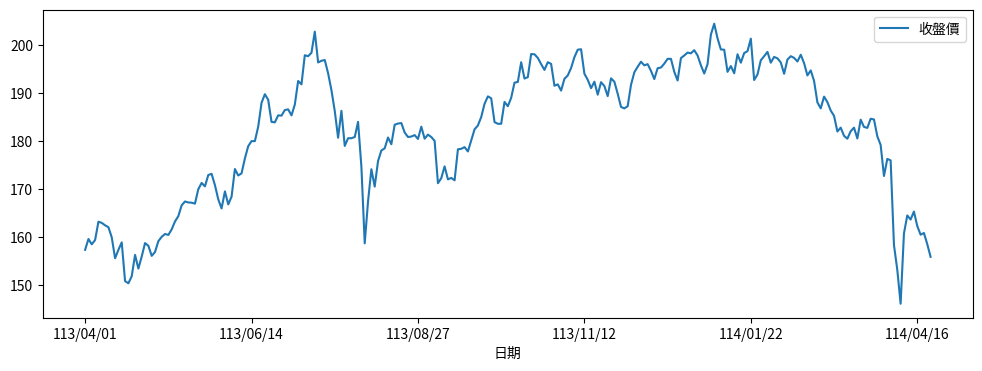

In [53]:
#繪製收盤價的折線圖。
df.plot(kind='line',x='日期',y='收盤價',figsize=(12,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

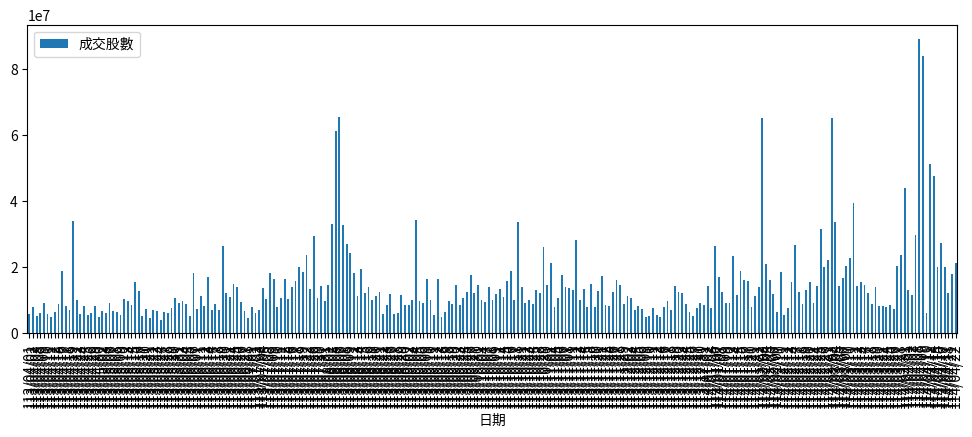

In [54]:
#成交量的長條圖。
df.plot(kind='bar',x='日期',y='成交股數',figsize=(12,4))
plt.show

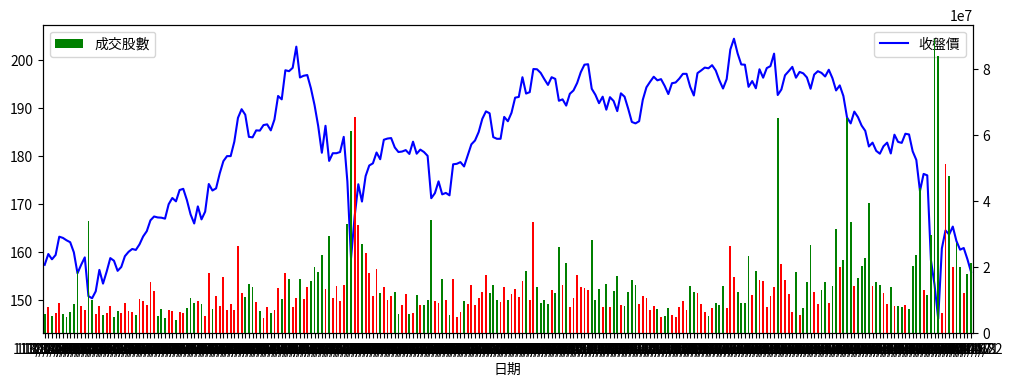

In [56]:
df['漲跌價差'] = pd.to_numeric(df['漲跌價差'], errors='coerce')
df['Color'] = df['漲跌價差'].apply(lambda x:'green' if x < 0 else 'red') #跌green 漲red

fig, ax1 = plt.subplots(figsize=(12,4))
df.plot(kind='line',x='日期',y='收盤價',ax=ax1,color='blue')
ax2 = ax1.twinx()
df.plot(kind='bar',x='日期',y='成交股數',ax=ax2,color=df['Color'])
plt.show()